In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
file_path = "Warehouse_and_Retail_Sales.csv"
df = pd.read_csv(file_path)

In [8]:
print(df['YEAR'].unique())

[2020 2017 2018 2019]


In [9]:
df.columns = df.columns.str.strip()

In [11]:
missing_summary = df.isnull().sum()
print(missing_summary)

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [12]:
most_common_supplier = df['SUPPLIER'].mode()[0]
df['SUPPLIER'].fillna(most_common_supplier, inplace=True)


/var/folders/gh/4t48940x6h7gcccrv59xkhph0000gn/T/ipykernel_10165/4285652059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SUPPLIER'].fillna(most_common_supplier, inplace=True)


In [13]:
missing_summary = df.isnull().sum()
print(missing_summary)

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           1
RETAIL SALES        3
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64


In [14]:
df.dropna(subset=['ITEM TYPE', 'RETAIL SALES'], inplace=True)

/var/folders/gh/4t48940x6h7gcccrv59xkhph0000gn/T/ipykernel_10165/3708754390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x="MONTH", y="RETAIL SALES", palette="Blues_d")


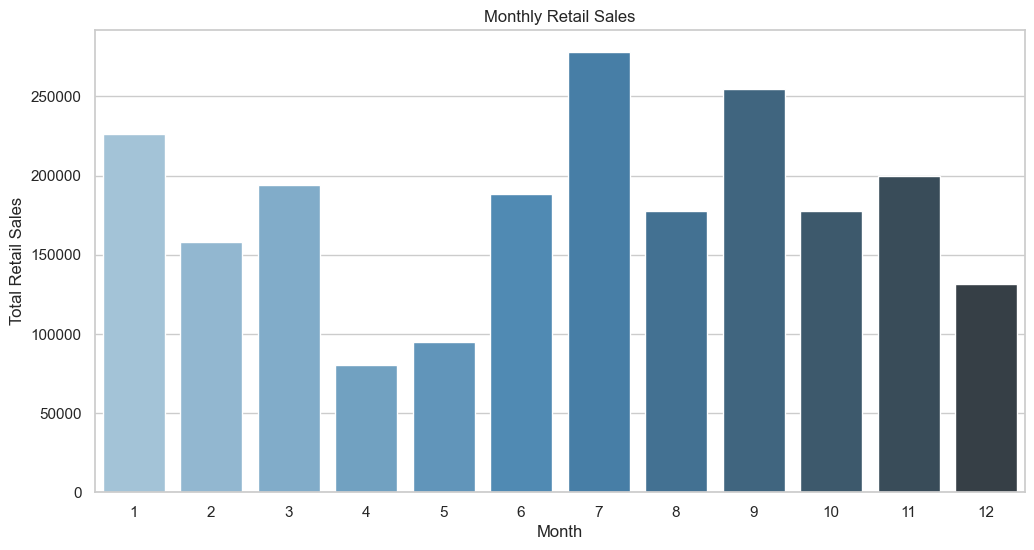

In [15]:
# 5.1 Retail Sales by Month
monthly_sales = df.groupby("MONTH")["RETAIL SALES"].sum().reset_index()
sns.barplot(data=monthly_sales, x="MONTH", y="RETAIL SALES", palette="Blues_d")
plt.title("Monthly Retail Sales")
plt.ylabel("Total Retail Sales")
plt.xlabel("Month")
plt.show()